In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

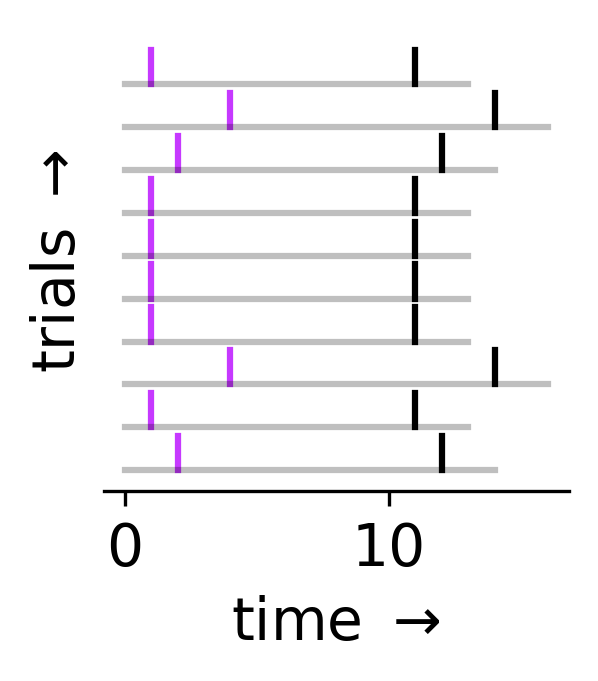

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 3.4759
Epoch 200, 3.2710
Epoch 400, 3.2441
Epoch 600, 3.2185
Epoch 800, 3.1688
Epoch 1000, 3.1386
Epoch 1200, 3.1171
Epoch 1400, 3.1029
Epoch 1600, 3.1072
Epoch 1800, 3.1155
Stopping.
Done! Best loss: 3.0749059200286863


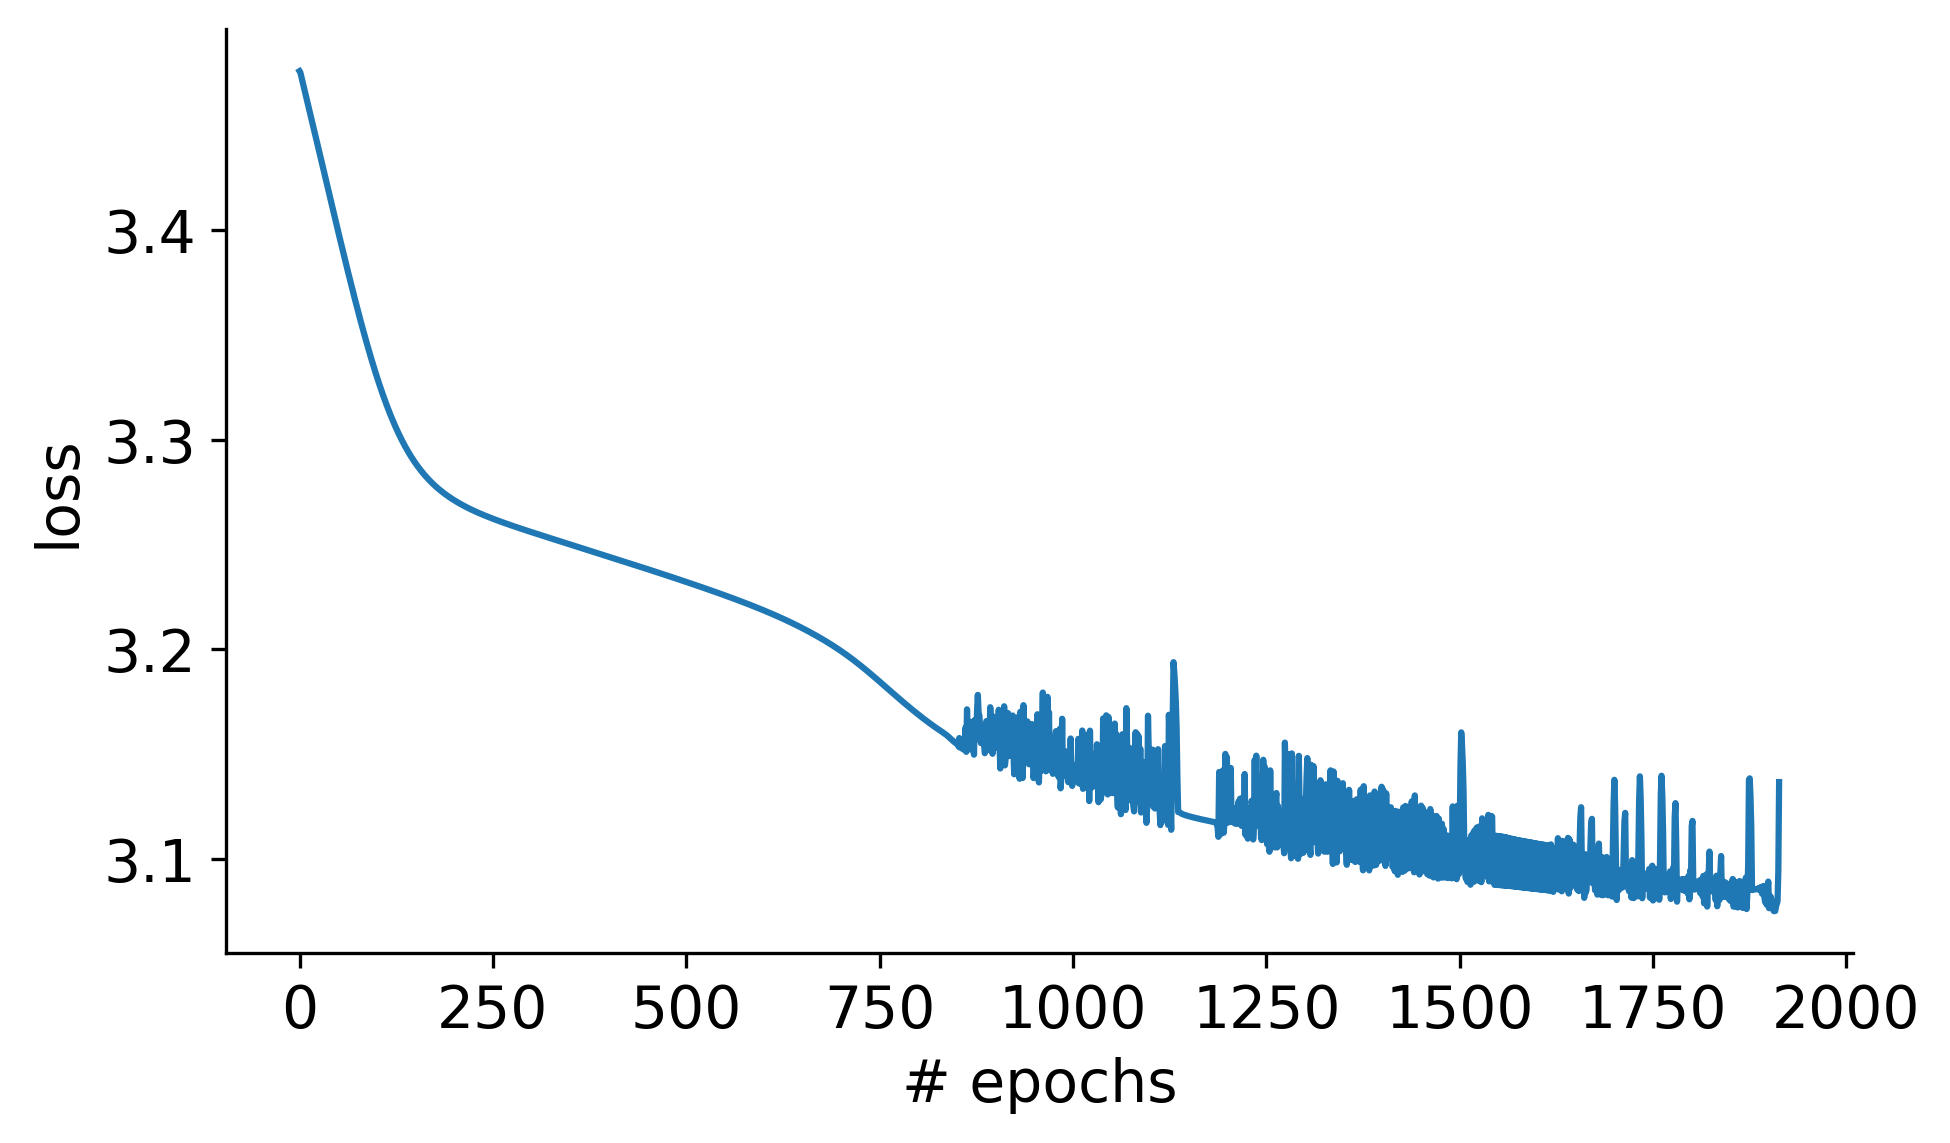

In [4]:
lr = 0.01
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=5000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

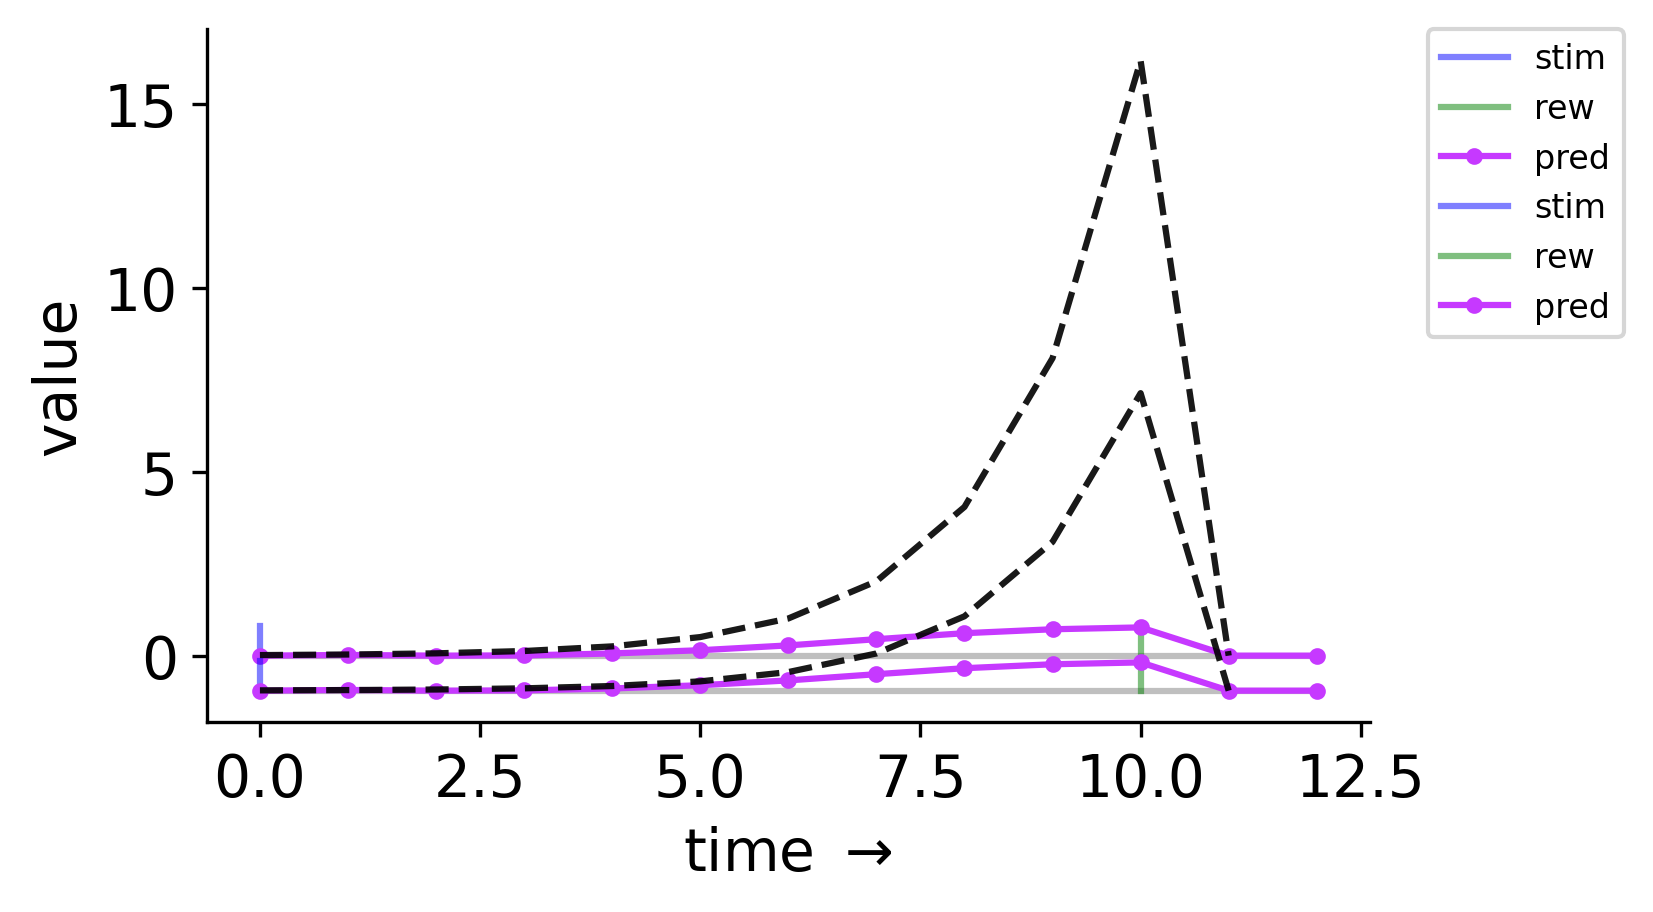

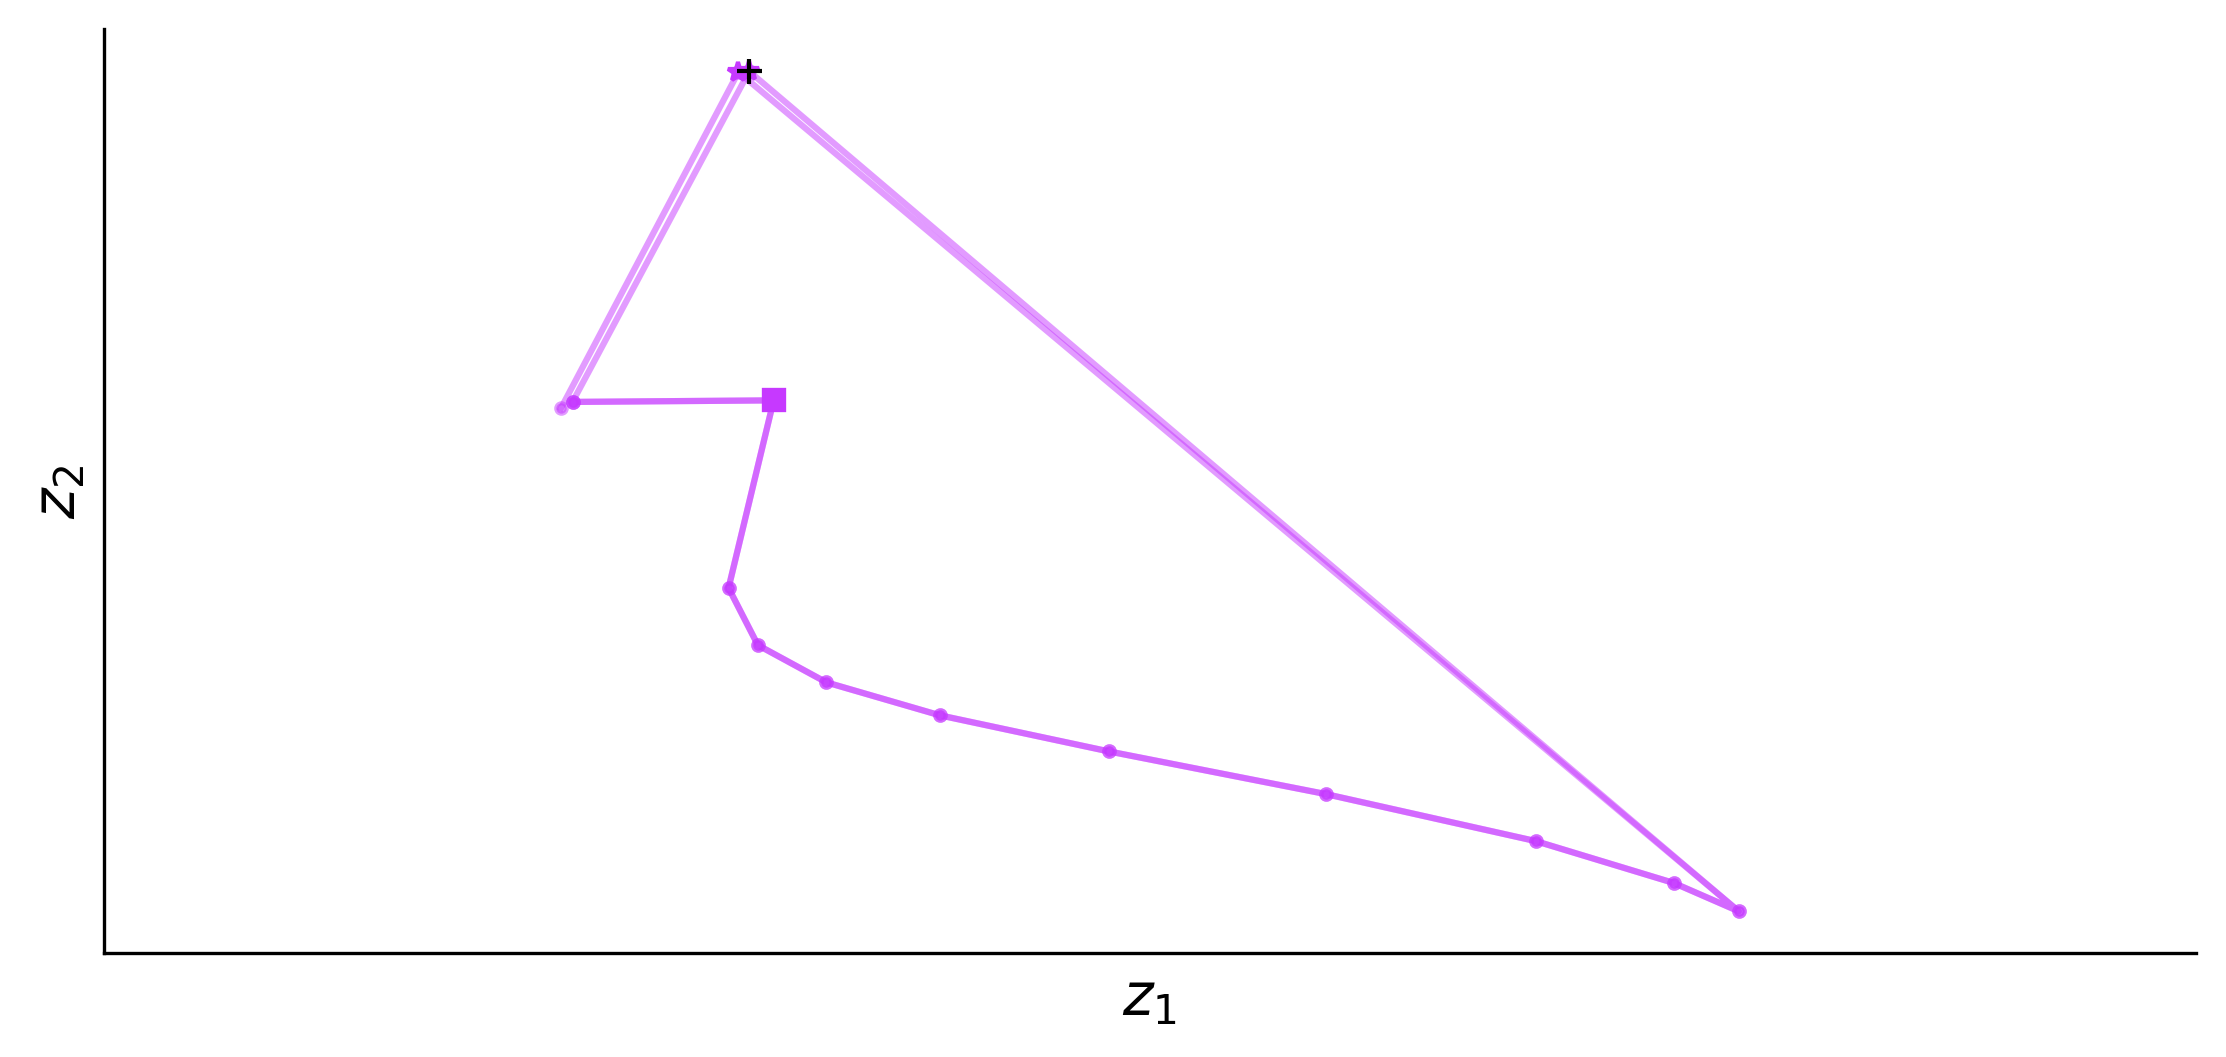

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])